In [5]:
import pandas as pd
from matplotlib import pyplot as plt


def plot_grouped_bar_chart(df: pd.DataFrame,
                           lowest_score: int,
                           highest_score: int):
    ax = df.plot(x='Model',
                 kind='bar',
                 grid=True,
                 stacked=False,
                 title='Metrics for different models')

    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel('Scores', fontsize=12)
    ax.set_ylim(lowest_score, highest_score)
    ax.set_yticks(range(lowest_score, highest_score + 1, 10))

    ax.tick_params(axis='x', rotation=45)

    plt.legend(loc='right')

    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.show()

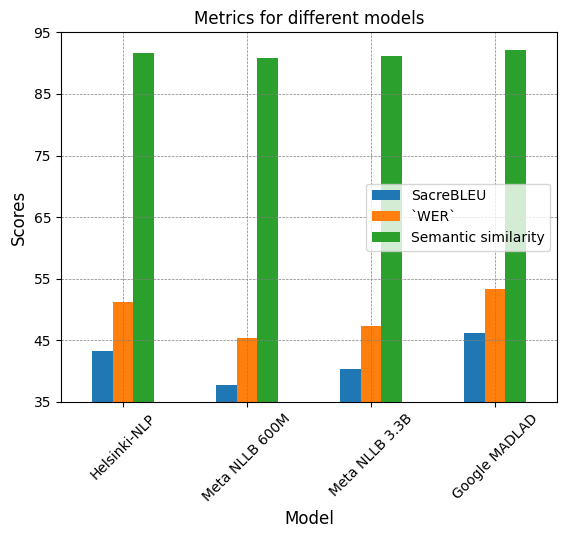

In [6]:
pretrained_data = pd.DataFrame([['Helsinki-NLP', 43.2, 51.3, 91.7],
                                ['Meta NLLB 600M', 37.8, 45.4, 90.9],
                                ['Meta NLLB 3.3B', 40.4, 47.3, 91.1],
                                ['Google MADLAD', 46.2, 53.4, 92.1]],
                               columns=['Model', 'SacreBLEU', '`WER`', 'Semantic similarity'])

plot_grouped_bar_chart(pretrained_data, 35, 95)

In [ ]:
finetuned_data = pd.DataFrame([['Fine-tuned Helsinki-NLP', 43.2, 51.3, 91.7],
                               ['Helsinki-NLP', 37.8, 45.4, 90.9],
                               ['Meta NLLB 3.3B', 37.8, 45.4, 90.9],
                               ['Google MADLAD', 40.4, 47.3, 91.1]],
                              columns=['Model', 'SacreBLEU', '`WER`', 'Semantic similarity'])

plot_grouped_bar_chart(pretrained_data, 35, 95)